In [1]:
from __future__ import division
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
import warnings # to silence convergence warnings
import scipy.linalg as lng 
# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default
from sklearn.preprocessing import StandardScaler

# Data preprocessing - deviding x dataset to 100 and rest 1000 and drop columns of which name is 'Unnamed: 0'

In [2]:
y = pd.read_csv('../dataset/y.csv')
x_num_100 = pd.read_csv('../dataset/x_numerical.csv')
x_cat_100 = pd.read_csv('../dataset/x_cat.csv')
x_new_num = pd.read_csv('../dataset/x_new_numerical.csv')
x_new_cat = pd.read_csv('../dataset/x_new_cat.csv')

In [3]:
x_100 = pd.concat([x_num_100,x_cat_100],axis=1)
x_100

,Unnamed: 0,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,x_92,x_93,x_94,x_95,Unnamed: 0,C_ 1,C_ 2,C_ 3,C_ 4,C_ 5
0,0,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,...,12.826477,-6.889479,3.443535,5.400120,0,I,I,H,J,K
1,1,-6.370690,7.792366,11.858663,-16.972991,-15.420530,21.683970,1.057192,2.559764,3.142095,...,10.039281,-7.678936,-0.189822,0.717526,1,H,I,H,I,I
2,2,-4.229569,2.756115,12.446836,-17.567113,-12.984783,23.436658,2.484515,5.453281,1.852533,...,14.186614,-9.527944,0.400832,-2.458897,2,G,I,K,J,G
3,3,-10.487072,1.460685,9.307533,-21.306282,-19.824912,23.436658,-0.442587,0.743039,-0.376102,...,8.871258,-7.514400,-3.448892,-2.612379,3,K,H,I,I,H
4,4,-13.066517,4.812794,10.641948,-17.691825,-14.430159,19.057921,1.900578,6.133609,-0.771247,...,10.532577,-7.509476,0.738517,0.754905,4,H,H,K,J,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-3.746623,5.360252,14.898749,-17.262103,-15.406944,25.744304,4.157661,6.127105,2.839280,...,17.348757,-6.059881,4.196626,1.168894,95,H,I,G,I,H
96,96,-4.311540,7.208115,12.591927,-17.232457,-11.173426,24.660276,2.922743,8.513152,4.327020,...,17.345148,-3.650362,3.535945,0.542156,96,H,I,I,J,K
97,97,-15.662503,0.521416,7.628422,-18.867588,-20.632873,20.905762,-3.530738,0.965488,3.142095,...,7.651474,-7.163831,-4.384652,-1.665588,97,G,H,I,G,K
98,98,-7.338365,1.597154,12.151154,-16.972991,-14.430159,23.185303,3.751106,6.357028,5.208797,...,11.647115,-4.830073,-2.378979,-3.120303,98,G,I,I,H,H


In [4]:
y = y.drop(columns={'Unnamed: 0'})
# y

In [5]:
x_new = pd.concat([x_new_num,x_new_cat],axis=1)
x_new

,Unnamed: 0,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,...,x_92,x_93,x_94,x_95,Unnamed: 0,C_ 1,C_ 2,C_ 3,C_ 4,C_ 5
0,0,-6.493200,4.857913,12.334877,-17.075041,-14.339100,23.791038,5.339252,5.103705,-0.275014,...,14.086256,-7.706938,3.391461,2.102585,0,G,I,G,J,G
1,1,-6.688701,6.402298,13.321841,-14.890575,-15.208925,22.978112,-3.424436,2.773030,1.326065,...,11.477398,-10.509565,-0.347968,-2.471949,1,I,I,J,K,H
2,2,-8.507726,1.639164,12.793980,-19.167274,-15.745444,20.336708,2.799327,5.103705,2.756582,...,12.541028,-6.555100,-3.588808,-2.342992,2,H,H,J,H,K
3,3,-12.841493,5.780583,11.307615,-22.689726,-17.290155,20.984080,-1.775278,2.554297,0.315108,...,12.257391,-8.267102,-1.373772,-5.374916,3,G,H,K,K,J
4,4,-8.555160,5.780583,13.122784,-12.977789,-14.144455,24.086075,6.270027,2.181681,6.731993,...,8.004617,-10.170813,2.445537,0.622106,4,H,I,J,H,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,-8.501994,7.364637,14.598509,-20.284036,-16.604685,20.682107,2.799327,3.956915,-1.673680,...,14.119678,-6.228438,-0.419140,-4.737494,995,H,I,H,I,G
996,996,-7.835061,5.410653,12.793980,-18.169995,-15.071277,23.569444,2.922559,5.423952,2.862670,...,12.541028,-8.891943,0.617816,0.622106,996,J,I,J,G,G
997,997,-7.547603,5.780583,12.793980,-17.146755,-14.997699,22.129570,4.148231,1.814772,1.798028,...,13.666244,-9.850952,-2.478082,1.597624,997,H,H,H,H,J
998,998,-10.989069,3.416966,12.793980,-17.205503,-10.092004,21.299033,2.201629,3.492949,2.862670,...,12.634788,-5.447805,-0.529636,1.834458,998,H,I,G,G,G


In [6]:
x_100 = x_100.drop(columns={'Unnamed: 0'})
x_new = x_new.drop(columns={'Unnamed: 0'})

## Changing categorical variables to dummy values
### Each row's values has been checked through Excel
### C_1 -> G, H, I, J, K 
### C_2 -> H, I
### C_3 -> G, H, I, J, K
### C_4 -> G, H, I, J, K
### C_5 -> G, H, I, J, K
#### -> So, 22 columns for catergorical variables have been created through pd.get_dummies
##### The number of numerical variables -> 95 (x1~x95)
##### -> 117 columns

In [7]:
x_100 = pd.get_dummies(x_100)
x_100

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,-4.042869,...,0,0,0,1,0,0,0,0,0,1
1,-6.370690,7.792366,11.858663,-16.972991,-15.420530,21.683970,1.057192,2.559764,3.142095,-4.286417,...,0,0,1,0,0,0,0,1,0,0
2,-4.229569,2.756115,12.446836,-17.567113,-12.984783,23.436658,2.484515,5.453281,1.852533,-4.042869,...,0,0,0,1,0,1,0,0,0,0
3,-10.487072,1.460685,9.307533,-21.306282,-19.824912,23.436658,-0.442587,0.743039,-0.376102,-7.535363,...,0,0,1,0,0,0,1,0,0,0
4,-13.066517,4.812794,10.641948,-17.691825,-14.430159,19.057921,1.900578,6.133609,-0.771247,-4.042869,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.746623,5.360252,14.898749,-17.262103,-15.406944,25.744304,4.157661,6.127105,2.839280,-3.862928,...,0,0,1,0,0,0,1,0,0,0
96,-4.311540,7.208115,12.591927,-17.232457,-11.173426,24.660276,2.922743,8.513152,4.327020,1.556960,...,0,0,0,1,0,0,0,0,0,1
97,-15.662503,0.521416,7.628422,-18.867588,-20.632873,20.905762,-3.530738,0.965488,3.142095,-12.522048,...,1,0,0,0,0,0,0,0,0,1
98,-7.338365,1.597154,12.151154,-16.972991,-14.430159,23.185303,3.751106,6.357028,5.208797,-4.042869,...,0,1,0,0,0,0,1,0,0,0


In [8]:
x_new = pd.get_dummies(x_new)
x_new = x_new.reset_index(drop=True)
x_new

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,-6.493200,4.857913,12.334877,-17.075041,-14.339100,23.791038,5.339252,5.103705,-0.275014,-3.910894,...,0,0,0,1,0,1,0,0,0,0
1,-6.688701,6.402298,13.321841,-14.890575,-15.208925,22.978112,-3.424436,2.773030,1.326065,-2.664610,...,0,0,0,0,1,0,1,0,0,0
2,-8.507726,1.639164,12.793980,-19.167274,-15.745444,20.336708,2.799327,5.103705,2.756582,-6.619169,...,0,1,0,0,0,0,0,0,0,1
3,-12.841493,5.780583,11.307615,-22.689726,-17.290155,20.984080,-1.775278,2.554297,0.315108,-4.498758,...,0,0,0,0,1,0,0,0,1,0
4,-8.555160,5.780583,13.122784,-12.977789,-14.144455,24.086075,6.270027,2.181681,6.731993,-3.910894,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-8.501994,7.364637,14.598509,-20.284036,-16.604685,20.682107,2.799327,3.956915,-1.673680,-5.303247,...,0,0,1,0,0,1,0,0,0,0
996,-7.835061,5.410653,12.793980,-18.169995,-15.071277,23.569444,2.922559,5.423952,2.862670,-0.561963,...,1,0,0,0,0,1,0,0,0,0
997,-7.547603,5.780583,12.793980,-17.146755,-14.997699,22.129570,4.148231,1.814772,1.798028,-4.611600,...,0,1,0,0,0,0,0,0,1,0
998,-10.989069,3.416966,12.793980,-17.205503,-10.092004,21.299033,2.201629,3.492949,2.862670,-4.334677,...,1,0,0,0,0,1,0,0,0,0


## Normalisation for numerical dataset

In [9]:
# y
# x_num_100
# x_new_num
scaler = StandardScaler()

In [10]:
x_100[x_100.columns[:95]]

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,x_86,x_87,x_88,x_89,x_90,x_91,x_92,x_93,x_94,x_95
0,-7.518161,5.423677,11.810360,-19.076321,-7.018273,23.841339,1.050206,3.132453,4.403462,-4.042869,...,-2.590210,-1.943897,3.011972,-31.614019,-3.990017,3.692902,12.826477,-6.889479,3.443535,5.400120
1,-6.370690,7.792366,11.858663,-16.972991,-15.420530,21.683970,1.057192,2.559764,3.142095,-4.286417,...,-3.573072,-1.583166,3.797721,-28.880360,-6.552140,7.270303,10.039281,-7.678936,-0.189822,0.717526
2,-4.229569,2.756115,12.446836,-17.567113,-12.984783,23.436658,2.484515,5.453281,1.852533,-4.042869,...,-4.023667,2.648645,4.067629,-32.769482,-5.438118,5.889789,14.186614,-9.527944,0.400832,-2.458897
3,-10.487072,1.460685,9.307533,-21.306282,-19.824912,23.436658,-0.442587,0.743039,-0.376102,-7.535363,...,-4.987491,3.992532,3.954274,-35.846878,-10.208559,7.024105,8.871258,-7.514400,-3.448892,-2.612379
4,-13.066517,4.812794,10.641948,-17.691825,-14.430159,19.057921,1.900578,6.133609,-0.771247,-4.042869,...,-4.021144,3.152862,3.366474,-31.789030,-3.632849,8.186575,10.532577,-7.509476,0.738517,0.754905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-3.746623,5.360252,14.898749,-17.262103,-15.406944,25.744304,4.157661,6.127105,2.839280,-3.862928,...,-2.473629,3.219622,7.296911,-31.600305,-1.008369,7.817448,17.348757,-6.059881,4.196626,1.168894
96,-4.311540,7.208115,12.591927,-17.232457,-11.173426,24.660276,2.922743,8.513152,4.327020,1.556960,...,1.541280,6.440714,4.503169,-29.506432,-6.276006,9.753088,17.345148,-3.650362,3.535945,0.542156
97,-15.662503,0.521416,7.628422,-18.867588,-20.632873,20.905762,-3.530738,0.965488,3.142095,-12.522048,...,-11.148246,2.701978,-2.396112,-39.440232,-8.566806,-0.300405,7.651474,-7.163831,-4.384652,-1.665588
98,-7.338365,1.597154,12.151154,-16.972991,-14.430159,23.185303,3.751106,6.357028,5.208797,-4.042869,...,-6.120490,2.701978,0.672467,-33.044920,-5.693242,6.465018,11.647115,-4.830073,-2.378979,-3.120303


In [11]:
x_100_num = x_100[x_100.columns[:95]]
x_new_num = x_new[x_new.columns[:95]]

In [12]:
y_norm = scaler.fit_transform(y)
x_100_norm = scaler.fit_transform(x_100_num)
x_new_norm = scaler.fit_transform(x_new_num)

In [13]:
Y = pd.DataFrame(y_norm, columns=y.columns)
x_100_norm = pd.DataFrame(x_100_norm,columns=x_100_num.columns)
x_new_norm = pd.DataFrame(x_new_norm, columns=x_new_num.columns)

In [14]:
X_100 = pd.concat([x_100_norm,x_100[x_100.columns[95:]]],axis=1)
X_100

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,0.151775,2.423177e-02,-3.091373e-01,-0.779451,2.633208,1.597031e-01,-6.747506e-01,-9.778783e-01,4.012262e-01,0.000000,...,0,0,0,1,0,0,0,0,0,1
1,0.544762,9.292057e-01,-2.900317e-01,0.000000,-0.351847,-6.916802e-01,-6.722333e-01,-1.219180e+00,1.412596e-16,-0.086371,...,0,0,1,0,0,0,0,1,0,0
2,1.278055,-9.949286e-01,-5.738851e-02,-0.220169,0.513496,1.402042e-15,-1.579113e-01,-3.742329e-16,-4.101947e-01,0.000000,...,0,0,0,1,0,1,0,0,0,0
3,-0.865020,-1.489857e+00,-1.299094e+00,-1.605829,-1.916585,1.402042e-15,-1.212664e+00,-1.984655e+00,-1.119098e+00,-1.238573,...,0,0,1,0,0,0,1,0,0,0
4,-1.748431,-2.091603e-01,-7.712855e-01,-0.266385,0.000000,-1.728023e+00,-3.683274e-01,2.866552e-01,-1.244789e+00,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.443455,-3.393347e-16,9.124297e-01,-0.107139,-0.347021,9.106884e-01,4.449905e-01,2.839148e-01,-9.632194e-02,0.063814,...,0,0,1,0,0,0,1,0,0,0
96,1.249981,7.059886e-01,7.026119e-16,-0.096153,1.157014,4.828880e-01,-1.600232e-16,1.289273e+00,3.769109e-01,1.985915,...,0,0,0,1,0,0,0,0,0,1
97,-2.637507,-1.848711e+00,-1.963242e+00,-0.702099,-2.203628,-9.987919e-01,-2.325449e+00,-1.890926e+00,1.412596e-16,-3.007043,...,1,0,0,0,0,0,0,0,0,1
98,0.213352,-1.437718e+00,-1.743412e-01,0.000000,0.000000,-9.919472e-02,2.984924e-01,3.807926e-01,6.573939e-01,0.000000,...,0,1,0,0,0,0,1,0,0,0


In [15]:
X_new = pd.concat([x_new_norm,x_new[x_new.columns[95:]]],axis=1)
X_new

,x_ 1,x_ 2,x_ 3,x_ 4,x_ 5,x_ 6,x_ 7,x_ 8,x_ 9,x_10,...,C_ 4_ G,C_ 4_ H,C_ 4_ I,C_ 4_ J,C_ 4_ K,C_ 5_ G,C_ 5_ H,C_ 5_ I,C_ 5_ J,C_ 5_ K
0,0.625466,-0.357971,-0.181294,0.028519,6.596725e-16,-1.321400e-15,0.946596,0.000000,-1.139488e+00,1.691889e-16,...,0,0,0,1,0,1,0,0,0,0
1,0.548833,0.241209,0.208445,0.897237,-3.230205e-01,-3.023604e-01,-2.319512,-0.941082,-5.580366e-01,4.748087e-01,...,0,0,0,0,1,0,1,0,0,0
2,-0.164191,-1.606760,0.000000,-0.803519,-5.222636e-01,-1.284807e+00,0.000000,0.000000,-3.852723e-02,-1.031798e+00,...,0,1,0,0,0,0,0,0,0,1
3,-1.862948,0.000000,-0.586946,-2.204326,-1.095911e+00,-1.044022e+00,-1.704894,-1.029403,-9.251778e-01,-2.239643e-01,...,0,0,0,0,1,0,0,0,1,0
4,-0.182785,0.000000,0.129840,1.657913,7.228386e-02,1.097364e-01,1.293483,-1.179858,1.405191e+00,1.691889e-16,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.161944,0.614571,0.712585,-1.247633,-8.413536e-01,-1.156339e+00,0.000000,-0.463052,-1.647430e+00,-5.304582e-01,...,0,0,1,0,0,1,0,0,0,0
996,0.099481,-0.143523,0.000000,-0.406922,-2.719032e-01,-8.241983e-02,0.045927,0.129310,3.225526e-16,1.275874e+00,...,1,0,0,0,0,1,0,0,0,0
997,0.212159,0.000000,0.000000,0.000000,-2.445791e-01,-6.179679e-01,0.502718,-1.328009,-3.866376e-01,-2.669548e-01,...,0,1,0,0,0,0,0,0,1,0
998,-1.136832,-0.917020,0.000000,-0.023363,1.577213e+00,-9.268786e-01,-0.222754,-0.650393,3.225526e-16,-1.614528e-01,...,1,0,0,0,0,1,0,0,0,0


# Final normalised dataframe

In [112]:
# Y
# X_100
# X_new

# Deviding x_100 into train, validation and test sets
### Ratio -> train:validation:test = 2:1:1 -> 50:25:25

In [113]:
# # scaled dataset in numpy array
# # y_np_
# # x_num_100_np_
# x_num_100_np_.shape, y_np_.shape

In [114]:
# x_100_train_np = x_num_100_np_[:50]
# x_100_val_np = x_num_100_np_[50:75]
# x_100_test_np = x_num_100_np_[75:]

# y_train_np = y_np_[:50]
# y_val_np = y_np_[50:75]
# y_test_np = y_np_[75:]

# x_100_train_np.shape, x_100_val_np.shape, x_100_test_np.shape, y_train_np.shape, y_val_np.shape, y_test_np.shape

# RMSE

In [115]:
def RMSE(y,y_pred):
    term = np.sum(np.power((y-y_pred),2))
    mean = np.mean(term)
    return np.sqrt(mean)

# OLS

In [116]:
# # y_np_
# # x_num_100_np_
 
# def ols_analytical(X, y):
#     inner_product = np.linalg.inv(X.T @ X)
#     outer_product = X.T @ y
#     betas = inner_product @ outer_product
#     return betas

# betas = ols_analytical(x_num_100_np_,y_np_)

In [117]:
# betas.shape

In [118]:
# result_train = x_100_train_np @ betas
# result_val = x_100_val_np @ betas
# result_test = x_100_test_np @ betas

In [119]:
# train_rmse = RMSE(y_train_np,result_train)
# val_rmse = RMSE(y_val_np, result_val)
# test_rmse = RMSE(y_test_np,result_test)

In [120]:
# train_rmse, val_rmse, test_rmse

In [121]:
# overall_rmse = RMSE(y_np_, x_num_100_np_@betas)
# overall_rmse

# Ridge regression

# Decision Tree Regression

In [19]:
# Y
# X_100
# X_new

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

dtree = DecisionTreeRegressor()
# dtree.fit(X_100,Y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(
    X_100, Y, test_size = 0.25)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
# RMSE among train dataset showed 0.0, and test dataset showed 1.13, which means obviously overfitting
dtree.fit(X_train,Y_train)
y_hat = dtree.predict(X_test)
# y_hat = y_hat.reshape(1,75)
# Y_train = Y_train.reshape(1,75)
# print(y_hat.shape, Y_train.shape)
mse = mean_squared_error(Y_test,y_hat)
rmse = np.sqrt(mse)
rmse

0.9797293696510385

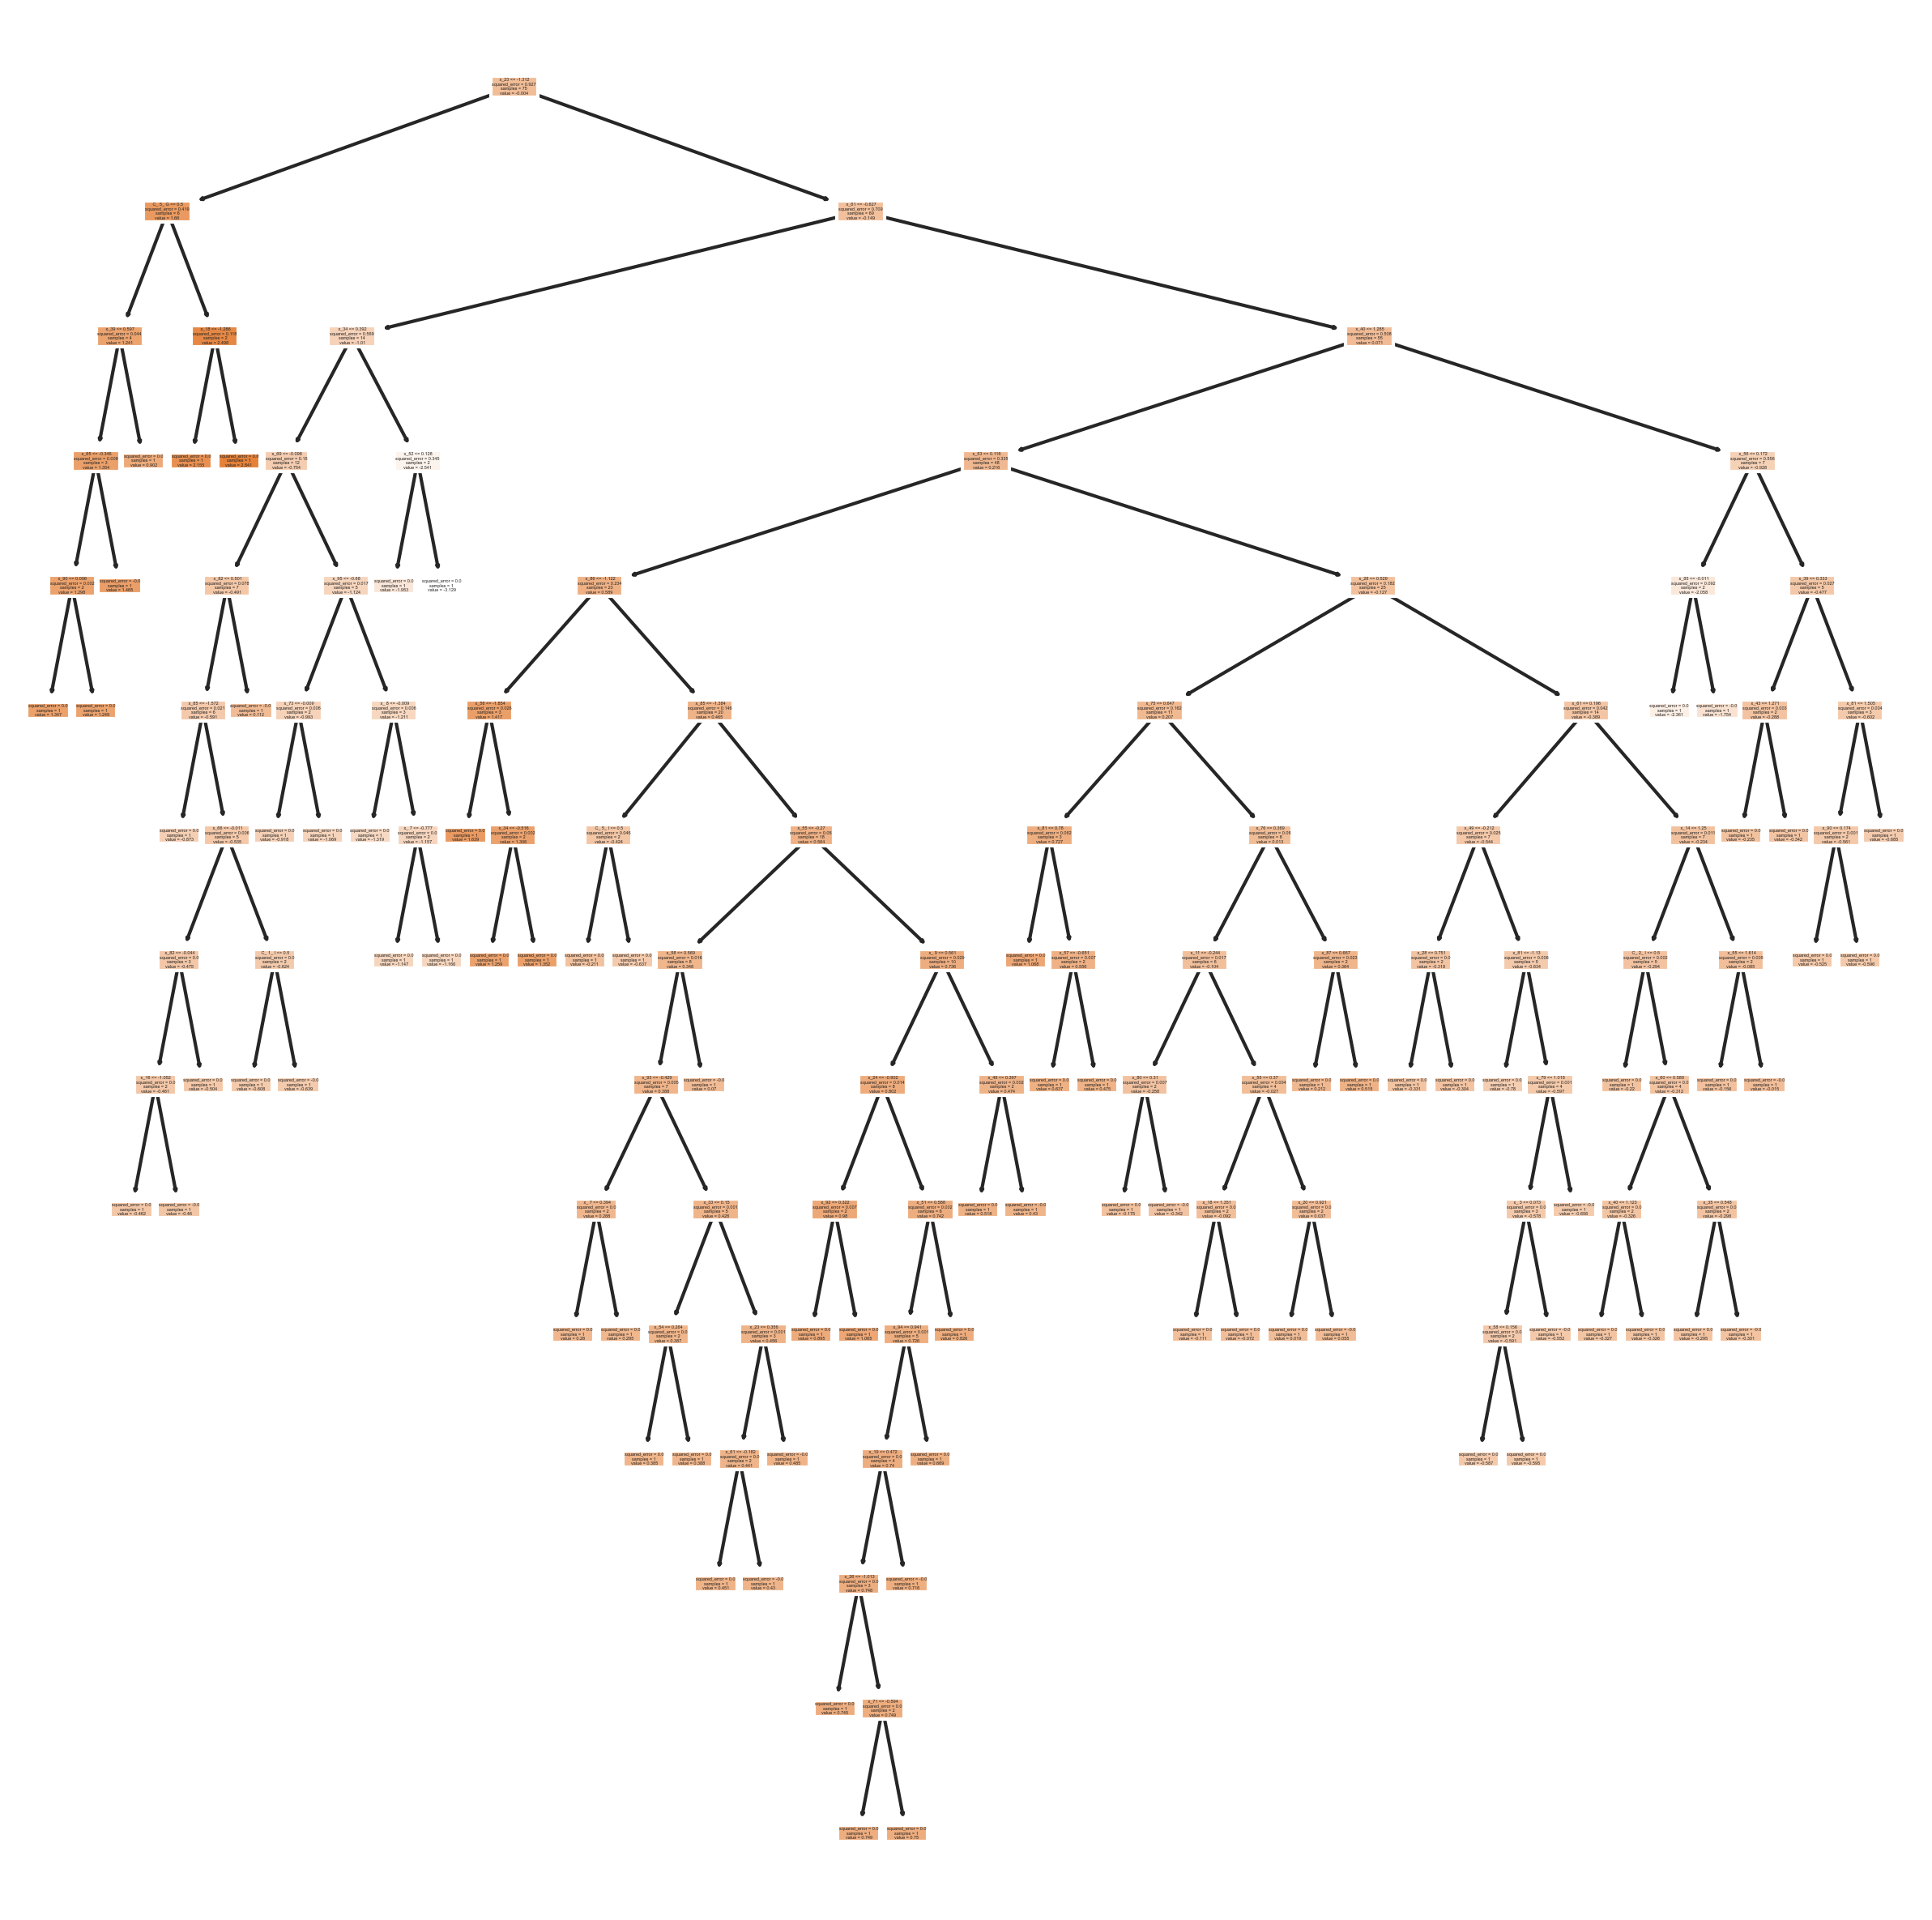

In [23]:
feature_names = X_100.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dtree,
               feature_names = feature_names,
               filled = True);

In [24]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=2021))
 
# Checking parameters of tree
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeregressor', 'decisiontreeregressor__ccp_alpha', 'decisiontreeregressor__criterion', 'decisiontreeregressor__max_depth', 'decisiontreeregressor__max_features', 'decisiontreeregressor__max_leaf_nodes', 'decisiontreeregressor__min_impurity_decrease', 'decisiontreeregressor__min_samples_leaf', 'decisiontreeregressor__min_samples_split', 'decisiontreeregressor__min_weight_fraction_leaf', 'decisiontreeregressor__random_state', 'decisiontreeregressor__splitter'])

In [25]:
# from sklearn.model_selection import validation_curve

# # max_dept range
# param_range = [1,2,3,4,5,6,7,8,9,10] 
# train_scores, validation_scores = validation_curve(estimator = pipe_tree,
#                                                    X = X_train,
#                                                    y = Y_train,
#                                                    param_name = 'decisiontreeregressor__max_depth',
#                                                    param_range=param_range,
#                                                    scoring= "neg_root_mean_squared_error",
#                                                    cv=10)
# train_mean = (np.mean(-train_scores, axis = 1))
# train_std = np.std(-train_scores, axis = 1)
# validation_mean = np.mean(-validation_scores, axis = 1)
# validation_std = np.std(-validation_scores, axis = 1)
 
# plt.plot(param_range, train_mean,
#         color='blue', marker='o',
#         markersize=5, label='training RMSE')
# plt.fill_between(param_range, 
#                 train_mean + train_std,
#                 train_mean - train_std,
#                 alpha=0.15,
#                 color='blue')
# plt.plot(param_range, validation_mean,
#         color='green', linestyle='--',
#         marker='s', markersize=5,
#         label='validation RMSE')
# plt.fill_between(param_range,
#                 validation_mean + validation_std,
#                 validation_mean - validation_std,
#                 alpha=0.15, color='green')
 
# plt.grid()
# plt.xlabel('Number of max_depth')
# plt.legend(loc='upper right')
# plt.xlabel('Parameter max_depth')
# plt.ylabel('RMSE')
# plt.tight_layout()
# plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()

param_grid = {
    'max_depth':range(1,10),
    'min_samples_leaf': np.array([10,20,30]),
}
cv_grid = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                       cv = 5, scoring = 'neg_mean_squared_error',
                       verbose=2, n_jobs=-1)

# Fit the grid search model
cv_grid.fit(X_train, Y_train)

print(cv_grid.best_params_)
print(-cv_grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'max_depth': 1, 'min_samples_leaf': 30}
0.878031258786943


In [27]:
cv_grid.best_estimator_

DecisionTreeRegressor(max_depth=1, min_samples_leaf=30)

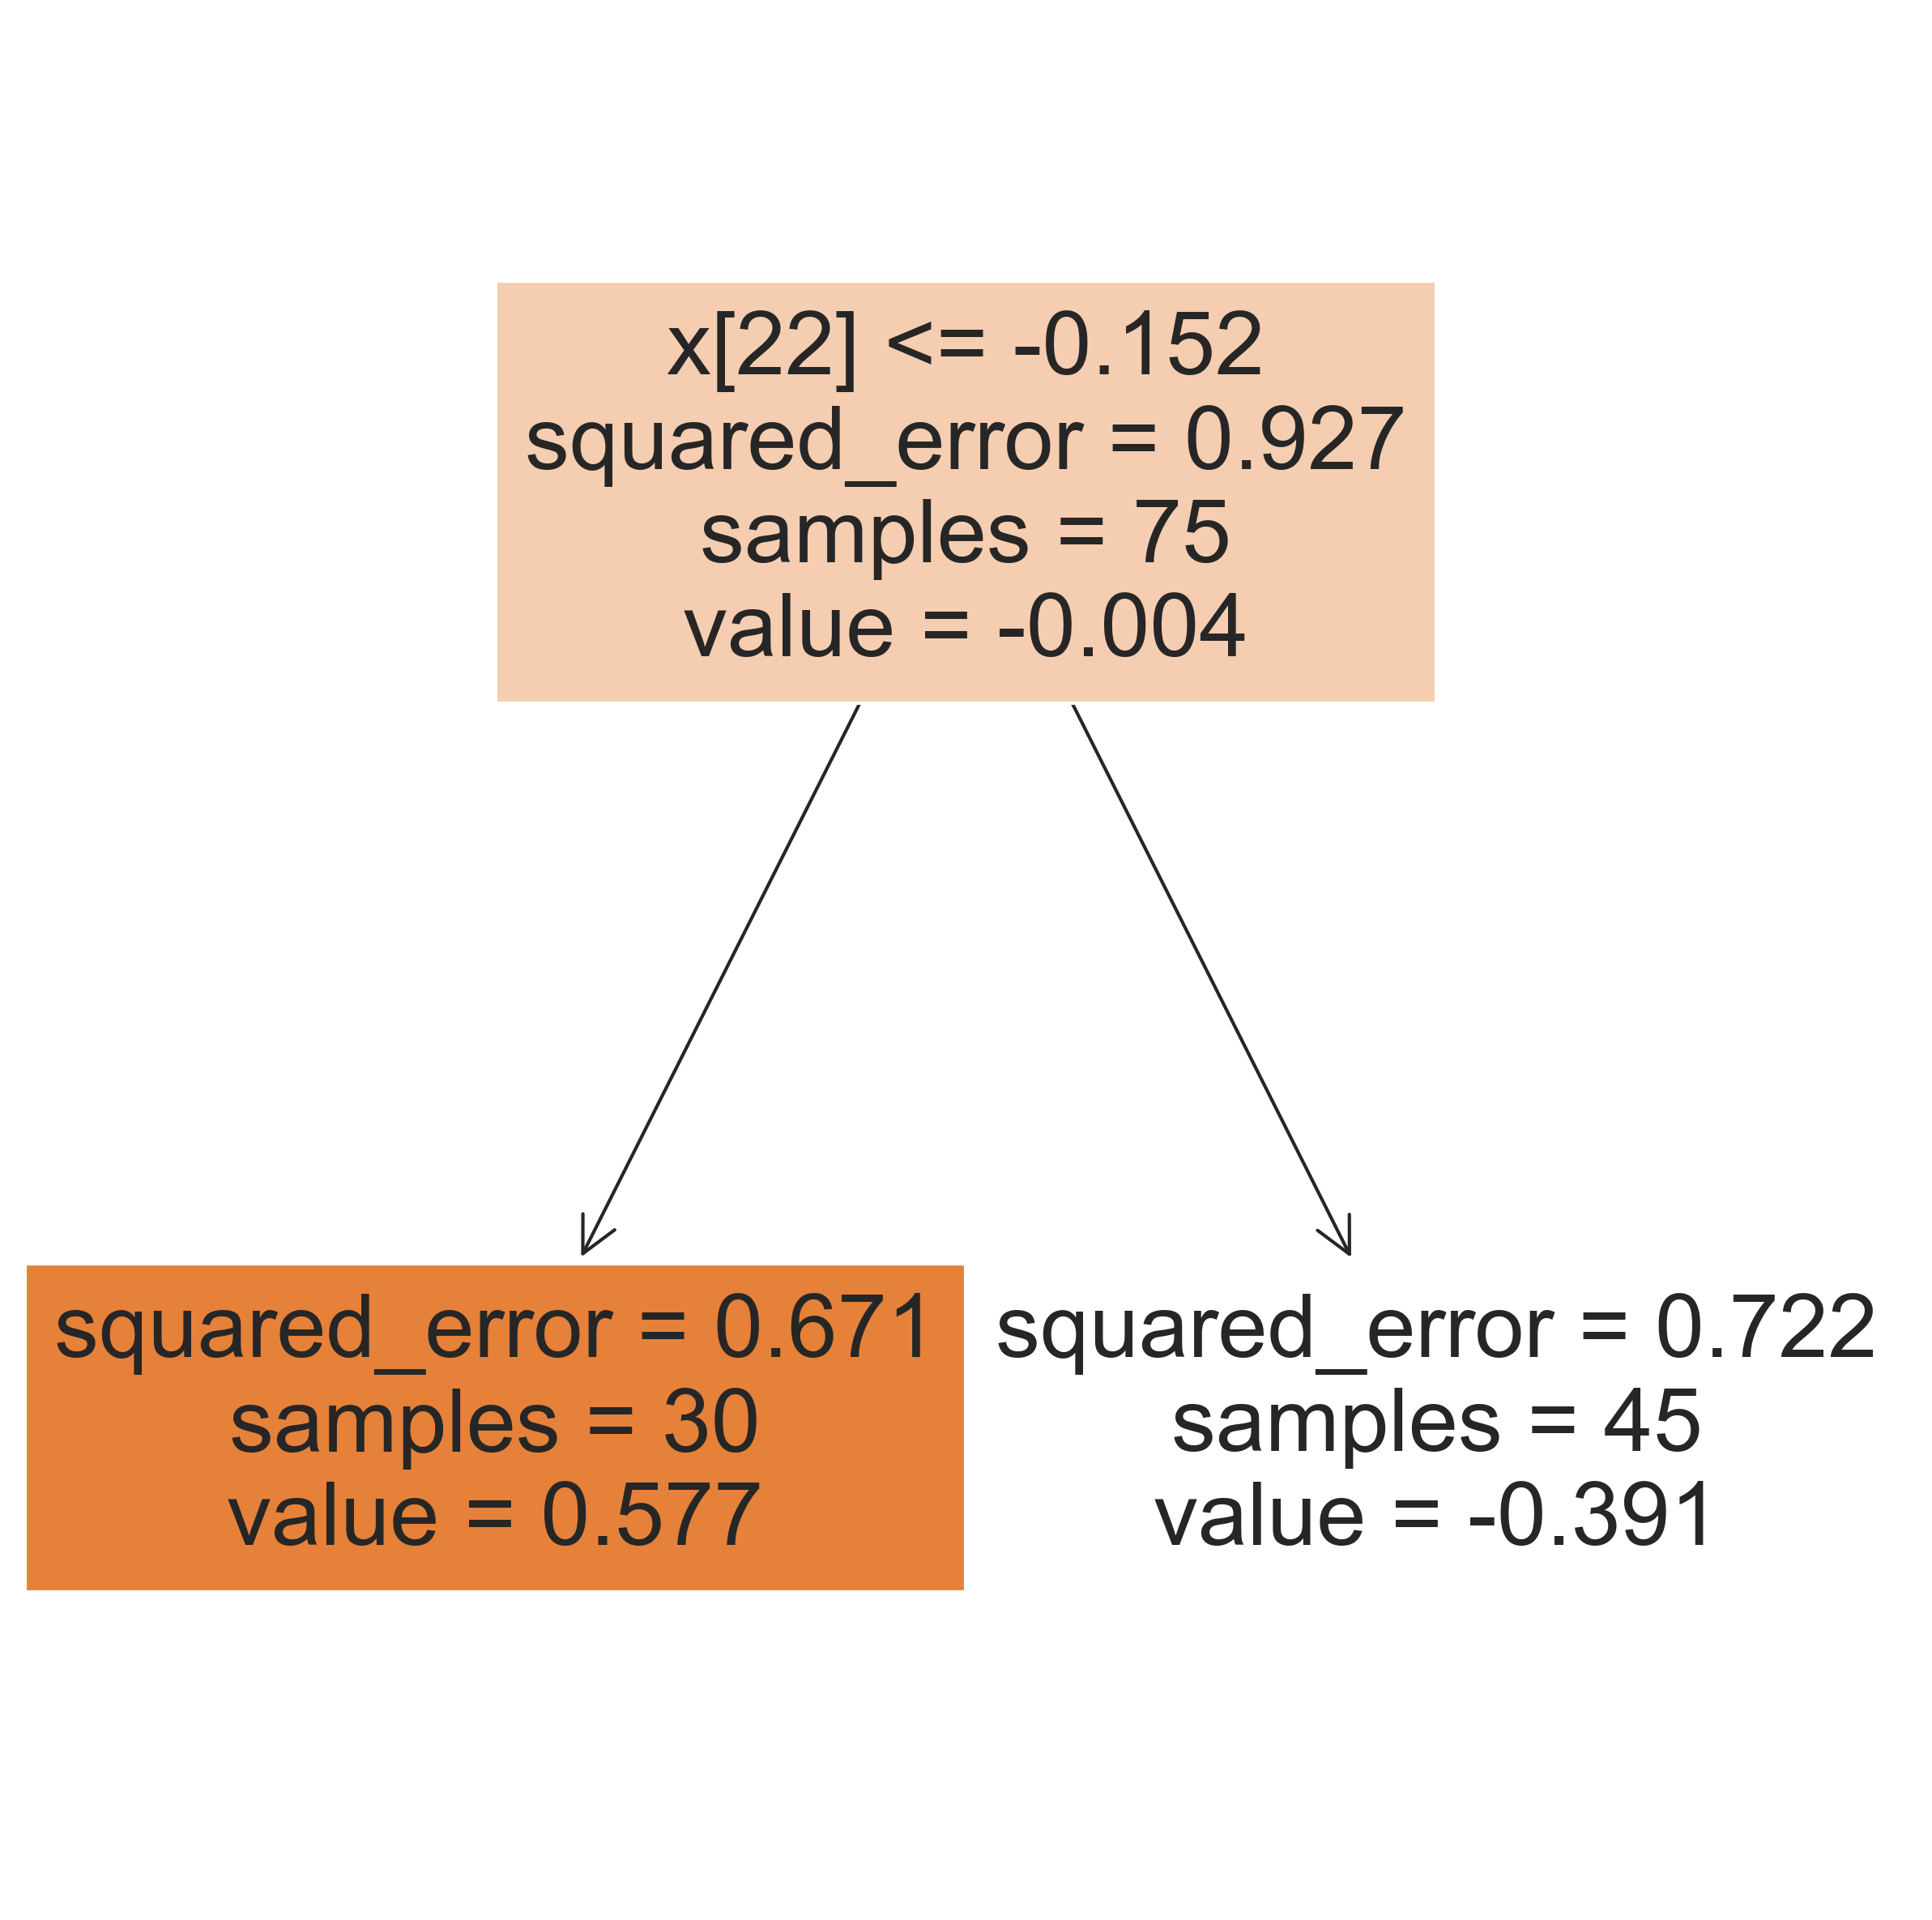

In [28]:
best_tree = cv_grid.best_estimator_
best_tree.fit(X_train, Y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(best_tree,
               filled = True);

In [29]:
# RMSE in test data
y_pred = best_tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
rmse

0.9284071618309208

In [31]:
X_new = X_new.rename(columns={'x_ 1':' x_ 1'})

In [32]:
# prediction of X_new
y_new_pred = best_tree.predict(X_new)
y_new_df = pd.DataFrame({'y_new':y_new_pred})
y_new_df

,y_new
0,-0.391300
1,0.577319
2,-0.391300
3,0.577319
4,-0.391300
...,...
995,-0.391300
996,-0.391300
997,-0.391300
998,-0.391300


In [37]:
y_new_df.value_counts()

y_new    
-0.391300    630
 0.577319    370
dtype: int64

# KNN regression

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k = 5
knn = KNeighborsRegressor(n_neighbors=k,weights='distance')
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f"Root Mean squared error: {rmse:.2f}")

Root Mean squared error: 0.94


In [61]:
Y_new = knn.predict(X_new)
Y_new_df = pd.DataFrame(Y_new)
Y_new_df.value_counts()

 0.703912    5
-0.106993    3
 0.176832    3
 0.361100    3
 0.586920    2
            ..
-0.115605    1
-0.114999    1
-0.114141    1
-0.112406    1
 1.566391    1
Length: 966, dtype: int64

In [62]:
Y_new_df

,0
0,-0.006820
1,-0.560397
2,-0.286988
3,0.400058
4,-0.030192
...,...
995,-0.158002
996,0.095672
997,-0.102267
998,-0.011394
